In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('online_retail_listing.csv',
                 delimiter= ';',encoding= 'latin-1')

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [6]:
#checking for duplicates
df.duplicated().sum()

34150

In [7]:
#dropping them
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014425 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1014425 non-null  object 
 1   StockCode    1014425 non-null  object 
 2   Description  1010160 non-null  object 
 3   Quantity     1014425 non-null  int64  
 4   InvoiceDate  1014425 non-null  object 
 5   Price        1014425 non-null  object 
 6   Customer ID  785599 non-null   float64
 7   Country      1014425 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 69.7+ MB


In [9]:
#to reconfirm if we still have dupes
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4265
Quantity            0
InvoiceDate         0
Price               0
Customer ID    228826
Country             0
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [13]:
df.describe()

,Quantity,Customer ID
count,785599.000000,785599.000000
mean,12.611412,15313.078667
std,143.474332,1695.992802
min,-74215.000000,12346.000000
25%,2.000000,13963.000000
50%,5.000000,15235.000000
75%,12.000000,16788.000000
max,74215.000000,18287.000000


In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom


In [15]:
#number of item per product
df['Description'].value_counts().head(5)

WHITE HANGING HEART T-LIGHT HOLDER    5114
REGENCY CAKESTAND 3 TIER              3642
ASSORTED COLOUR BIRD ORNAMENT         2683
JUMBO BAG RED RETROSPOT               2680
PARTY BUNTING                         2110
Name: Description, dtype: int64

In [16]:

des = df.groupby('Description').sum()

In [17]:
#number of items orderd 
des.head()

,Quantity,Customer ID
Description,,
DOORMAT UNION JACK GUNS AND ROSES,167,813775.0
3 STRIPEY MICE FELTCRAFT,660,1777142.0
4 PURPLE FLOCK DINNER CANDLES,275,754778.0
50'S CHRISTMAS GIFT BAG LARGE,1853,1624122.0
ANIMAL STICKERS,385,182720.0


In [18]:
#amount of orders that came in from each country
df['Country'].value_counts().head()

United Kingdom    705114
Germany            17042
EIRE               15729
France             13667
Netherlands         5051
Name: Country, dtype: int64

In [19]:
df['Price'] = df['Price'].apply(lambda x : float(str(x.replace(",",'.'))))
df['Total_price'] = df["Quantity"]*df["Price"]

In [20]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,1.25,13085.0,United Kingdom,30.0


In [21]:

df.groupby('Invoice').agg({'Total_price':'sum'}).head()

,Total_price
Invoice,
489434,505.30
489435,145.80
489436,630.33
489437,310.75
489438,2286.24


In [22]:
#which product are expensive
df.groupby('Description').agg({'Price':'max'}).sort_values('Price',ascending =False).head()

,Price
Description,
Manual,38970.00
POSTAGE,8142.75
Discount,1867.86
DOTCOM POSTAGE,1526.76
CRUK Commission,1038.75


In [23]:
#items canceled 

In [24]:
canceled = df[~df['Invoice'].str.contains('C',na = False)]

In [25]:
canceled.sort_values('Quantity',ascending = True).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price
1048574,580502,23046,PAPER LANTERN 9 POINT DELUXE STAR,1,4.12.2011 13:15,6.65,16931.0,United Kingdom,6.65
682804,550202,22605,WOODEN CROQUET GARDEN SET,1,15.04.2011 10:27,14.95,13090.0,United Kingdom,14.95
682803,550202,22606,WOODEN SKITTLES GARDEN SET,1,15.04.2011 10:27,15.95,13090.0,United Kingdom,15.95
682733,550196,21340,CLASSIC METAL BIRDCAGE PLANT HOLDER,1,15.04.2011 10:09,12.75,14796.0,United Kingdom,12.75
682731,550196,22630,DOLLY GIRL LUNCH BOX,1,15.04.2011 10:09,1.95,14796.0,United Kingdom,1.95


In [26]:
#PERFORMING RFM ANALYSIS

In [27]:
df = df[~df['Invoice'].str.contains('C',na = False)]
df['Customer ID'] = df['Customer ID'].astype(int)

In [28]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [29]:
#handling outliers

In [30]:
for feature in ["Quantity","Price","Total_price"]:

    Q1 = df[feature].quantile(0.01)
    Q3 = df[feature].quantile(0.99)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Quantity yes
1718
Price yes
1354
Total_price yes
1758


In [31]:
#Recency ,how recent did the customers purchase items

In [32]:
recency =(pd.datetime(2012, 1, 1)-df.groupby('Customer ID').agg({'InvoiceDate':'max'}).rename(columns = {'InvoiceDate':'Recency'}))
recency['Recency'] = recency['Recency'].apply(lambda x:x.days)
recency.head()

,Recency
Customer ID,
12346,347
12347,61
12348,97
12349,40
12350,332


In [33]:
recency.max()

Recency    1083
dtype: int64

In [34]:
#how often do they purchase
frequency = df.groupby('Customer ID').agg({'InvoiceDate':'nunique'}).rename(columns = {'InvoiceDate':'Frequency'})

In [35]:
frequency.head()

,Frequency
Customer ID,
12346,12
12347,7
12348,5
12349,4
12350,1


In [36]:
#how much do they spend.
monetary = df.groupby('Customer ID').agg({'Total_price':'sum'}).rename(columns = {'Total_price':'Monetary'})

In [37]:
monetary.head()

,Monetary
Customer ID,
12346,77556.46
12347,4696.71
12348,2019.40
12349,4428.69
12350,334.40


In [38]:
RFM = pd.concat([recency,frequency,monetary],axis = 1 )

In [39]:
RFM.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,347,12,77556.46
12347,61,7,4696.71
12348,97,5,2019.40
12349,40,4,4428.69
12350,332,1,334.40


In [40]:
#create an RFM score

In [41]:
RFM['Recency_score'] = pd.qcut(RFM['Recency'],5 ,labels=[5,4,3,2,1])
RFM['Frequency_score'] = pd.qcut(RFM['Frequency'].rank(method = 'first'),5,labels=[1,2,3,4,5])
RFM['Monetary_score'] = pd.qcut(RFM['Monetary'],5 , labels=[1,2,3,4,5])

In [42]:
RFM.head()

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score
Customer ID,,,,,,
12346,347,12,77556.46,2,5,5
12347,61,7,4696.71,4,4,5
12348,97,5,2019.40,3,4,4
12349,40,4,4428.69,5,3,5
12350,332,1,334.40,2,1,2


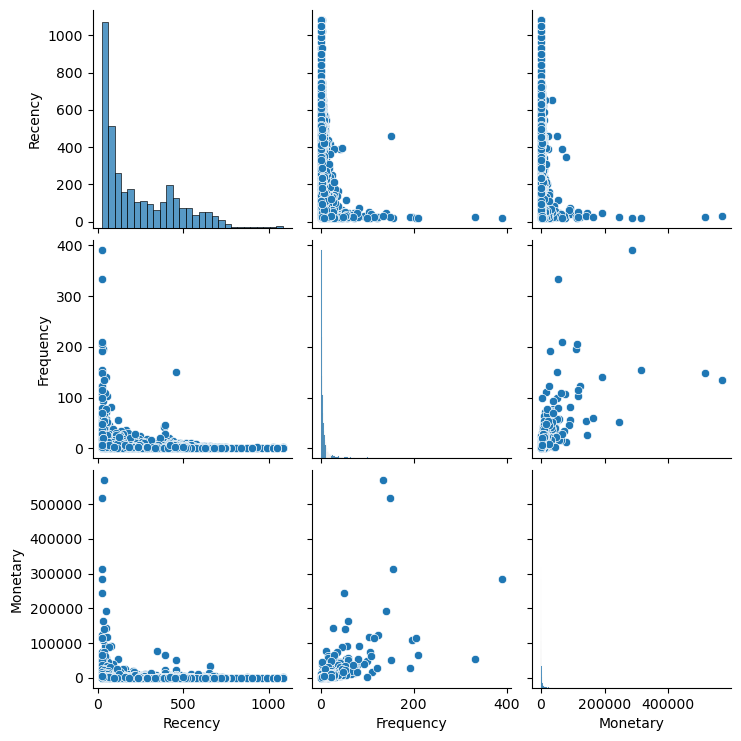

In [43]:
sns.pairplot(data = RFM)

In [44]:
RFM['RFM_Score'] = (RFM['Recency_score'].astype(str)+RFM['Frequency_score'].astype(str)+RFM['Monetary_score'].astype(str))

In [45]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5863 entries, 12346 to 18287
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Recency          5863 non-null   int64   
 1   Frequency        5863 non-null   int64   
 2   Monetary         5863 non-null   float64 
 3   Recency_score    5863 non-null   category
 4   Frequency_score  5863 non-null   category
 5   Monetary_score   5863 non-null   category
 6   RFM_Score        5863 non-null   object  
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 246.8+ KB


In [46]:
RFM.head()

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_Score
Customer ID,,,,,,,
12346,347,12,77556.46,2,5,5,255
12347,61,7,4696.71,4,4,5,445
12348,97,5,2019.40,3,4,4,344
12349,40,4,4428.69,5,3,5,535
12350,332,1,334.40,2,1,2,212


In [47]:
#mapping regular Expressions to customer Segments

In [48]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}


RFM['Segment'] = RFM['Recency_score'].astype(str)+RFM['Frequency_score'].astype(str)
RFM['Segment'] = RFM['Segment'].replace(seg_map,regex = True)

In [49]:
RFM.tail()

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_Score,Segment
Customer ID,,,,,,,,
18283,31,21,2456.90,5,5,4,554,champions
18284,630,1,461.68,1,2,2,122,hibernating
18285,682,1,427.00,1,2,2,122,hibernating
18286,498,2,1296.43,1,3,4,134,at_Risk
18287,21,7,4182.99,5,4,5,545,champions


In [50]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5863 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Recency          5863 non-null   int64   
 1   Frequency        5863 non-null   int64   
 2   Monetary         5863 non-null   float64 
 3   Recency_score    5863 non-null   category
 4   Frequency_score  5863 non-null   category
 5   Monetary_score   5863 non-null   category
 6   RFM_Score        5863 non-null   object  
 7   Segment          5863 non-null   object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 292.6+ KB


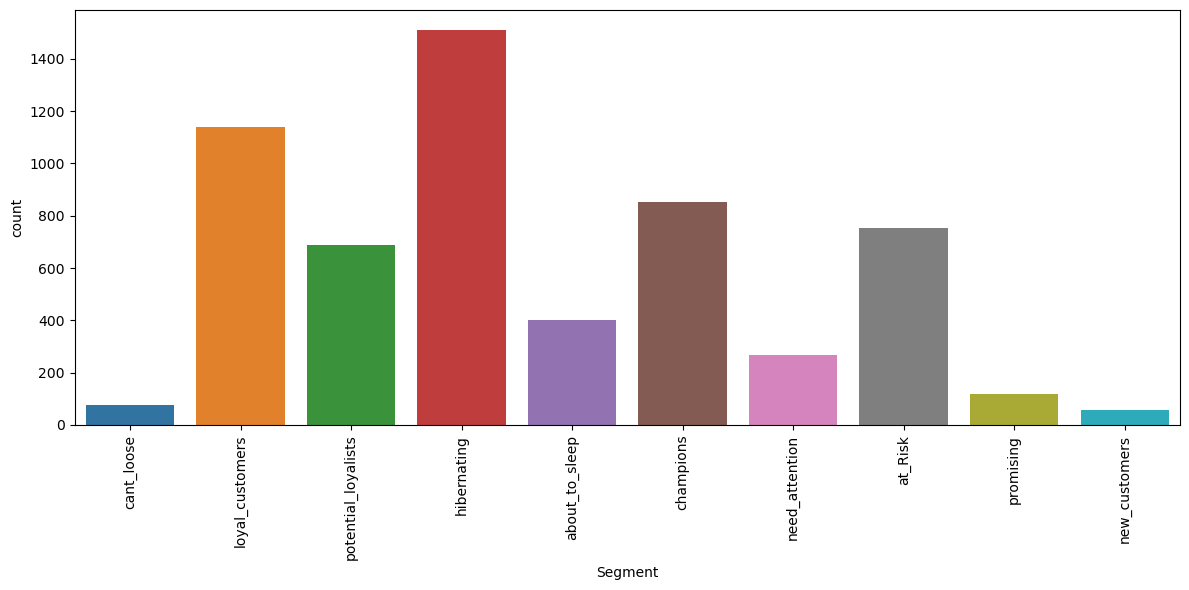

In [51]:
plt.figure(figsize = (12,6))
sns.countplot(data = RFM,x = 'Segment')
plt.xticks(rotation = 'vertical')
plt.tight_layout()

In [52]:
#sumarry statistics 

In [53]:
RFM_Stat = RFM[['Segment','Recency','Frequency','Monetary']].groupby('Segment').agg(['mean','median','count','std'])
RFM_Stat.columns = RFM_Stat.columns.map('_'.join).str.strip('|')

In [54]:
RFM_Stat

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
about_to_sleep,151.840399,151.0,401,40.878044,1.413965,1.0,401,0.493158,529.783723,353.660,401,597.122627
at_Risk,397.523873,400.0,754,110.259166,3.803714,3.0,754,1.483396,1295.603966,943.785,754,1698.021590
cant_loose,347.013333,348.0,75,92.303040,14.613333,11.0,75,17.300128,6951.357213,3616.140,75,12769.905778
champions,32.469484,33.0,852,7.246394,18.291080,11.0,852,27.204492,9911.769359,3662.805,852,33655.599168
hibernating,497.461284,472.0,1511,163.593312,1.236929,1.0,1511,0.425339,419.587711,275.880,1511,766.296790
loyal_customers,99.798946,86.0,1139,48.058574,10.165057,8.0,1139,8.759979,4483.951911,2594.620,1139,9803.828878
need_attention,151.220149,146.0,268,40.647936,3.089552,3.0,268,0.658709,1112.998884,843.795,268,1352.946476
new_customers,35.321429,36.0,56,6.472620,1.000000,1.0,56,0.000000,293.492321,245.700,56,212.706073
potential_loyalists,52.522562,47.0,687,18.898586,2.593886,3.0,687,0.898407,1020.225197,675.640,687,2422.603172


In [55]:
#time to use our Ml model K means

In [56]:
RFM_k = RFM.loc[:,'Recency':'Monetary']

In [57]:
RFM_k.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,347,12,77556.46
12347,61,7,4696.71
12348,97,5,2019.40
12349,40,4,4428.69
12350,332,1,334.40


In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scale = MinMaxScaler()

In [60]:
datas = scale.fit_transform(RFM_k)

In [61]:
datas.shape

(5863, 3)

In [62]:
from sklearn.cluster import KMeans

In [63]:
kmean = KMeans(n_clusters= 8 )

In [64]:
kmean.fit(datas)

KMeans()

In [65]:
kmean.cluster_centers_

array([[3.05808500e-02, 2.03871292e-02, 6.65902545e-03],
       [3.70966377e-01, 5.09299273e-03, 1.86848140e-03],
       [1.27315557e-01, 9.86851487e-03, 3.18756728e-03],
       [6.07926483e-01, 8.04305757e-04, 9.51814922e-04],
       [2.41591857e-01, 5.67091395e-03, 2.17105921e-03],
       [8.56425433e-03, 3.79242979e-01, 2.89351774e-01],
       [8.86198547e-01, 1.56985871e-04, 4.69636290e-04],
       [4.76231667e-01, 2.60802723e-03, 1.09999582e-03]])

In [66]:
kmean.labels_

array([1, 0, 0, ..., 3, 7, 0])

In [67]:
new_cluster = []

km = range (1,40)

In [68]:
for k in km:
    kmean = KMeans(n_clusters=k).fit(datas)
    new_cluster.append(kmean.inertia_)

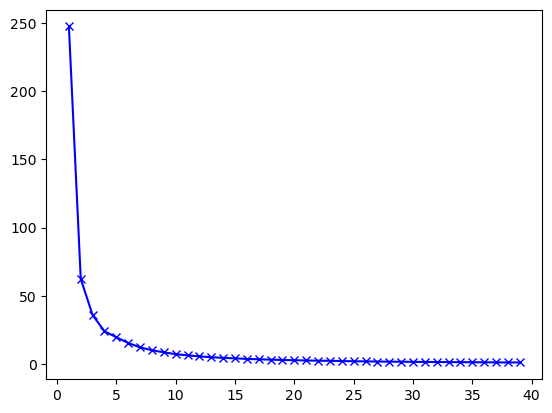

In [69]:
plt.plot(km,new_cluster,'bx-')

In [70]:
new = kmean.labels_

In [71]:
new

array([25, 30, 14, ..., 29, 20, 12])

In [72]:
from yellowbrick.cluster import KElbowVisualizer

In [73]:
kmean = KMeans()

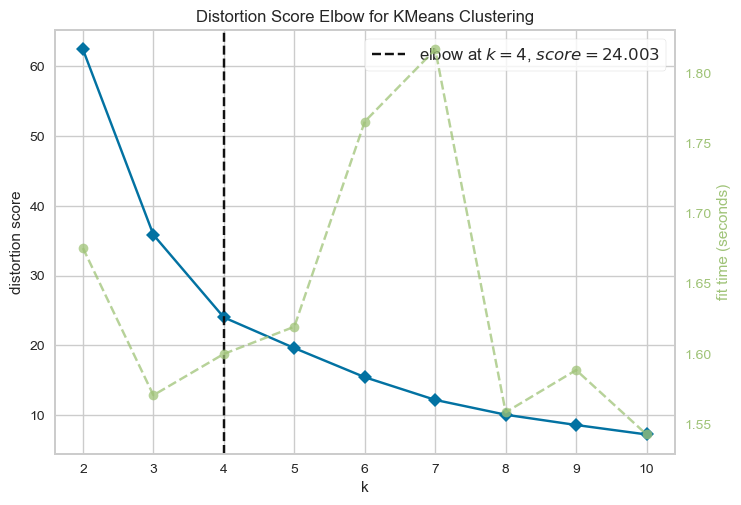

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
visual = KElbowVisualizer(kmean,km = (1,39))
visual.fit(datas)
visual.poof()

In [75]:
kmean = KMeans(n_clusters= 4).fit(datas)

In [76]:
cluster = kmean.labels_

In [77]:
pd.DataFrame({'Customer ID':RFM.index,'Cluster':cluster})
RFM_k['Cluster_no'] = cluster
RFM_k['Cluster_no'] = RFM_k['Cluster_no'] + 1
RFM_k.tail()

,Recency,Frequency,Monetary,Cluster_no
Customer ID,,,,
18283,31,21,2456.90,1
18284,630,1,461.68,3
18285,682,1,427.00,3
18286,498,2,1296.43,2
18287,21,7,4182.99,1


Text(0, 0.5, 'Frequency')

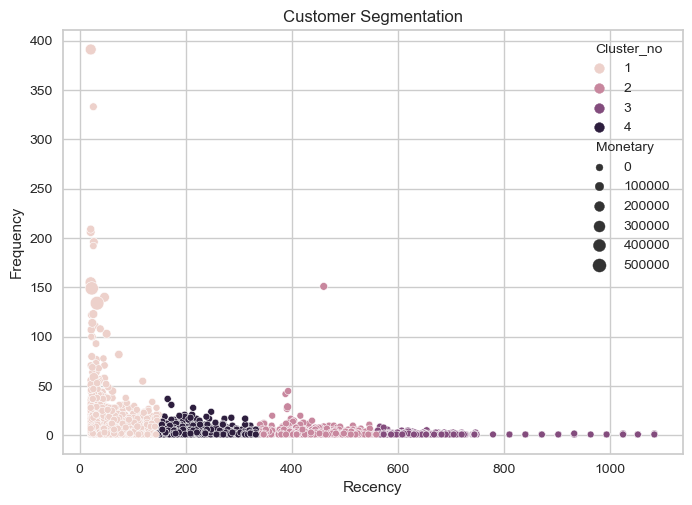

In [78]:
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster_no', size='Monetary', data=RFM_k)
plt.title('Customer Segmentation')
plt.xlabel('Recency')
plt.ylabel('Frequency')

Text(0, 0.5, 'Recency')

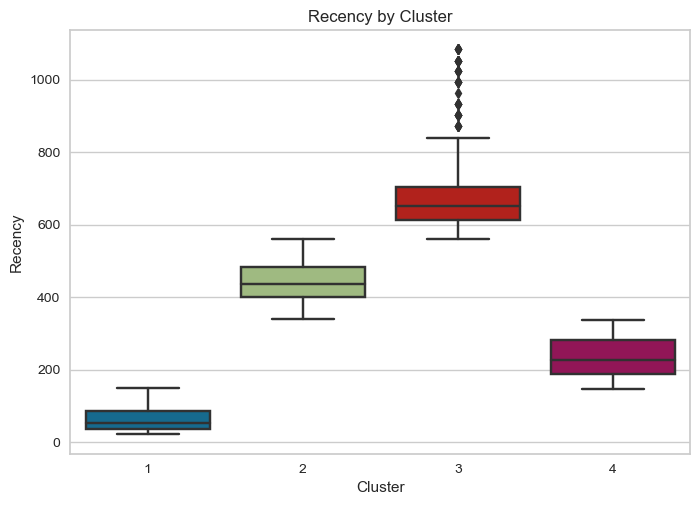

In [79]:
sns.boxplot(x='Cluster_no', y='Recency', data=RFM_k)
plt.title('Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')

Text(0, 0.5, 'Frequecy')

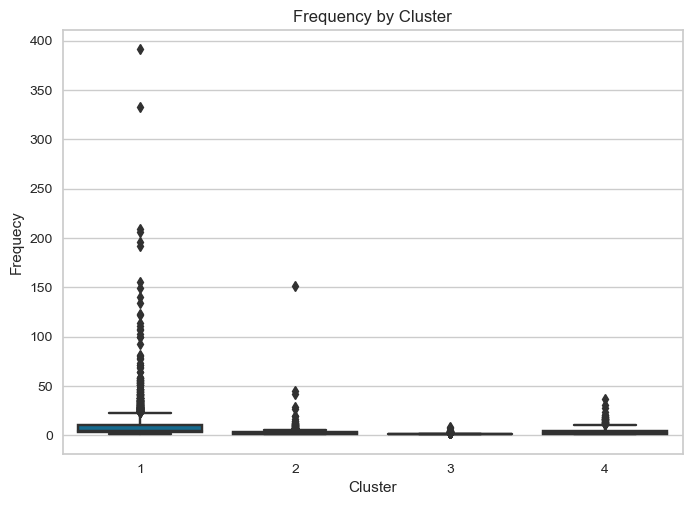

In [80]:
sns.boxplot(x='Cluster_no', y='Frequency', data=RFM_k)
plt.title('Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequecy')

Text(0, 0.5, 'Monetary')

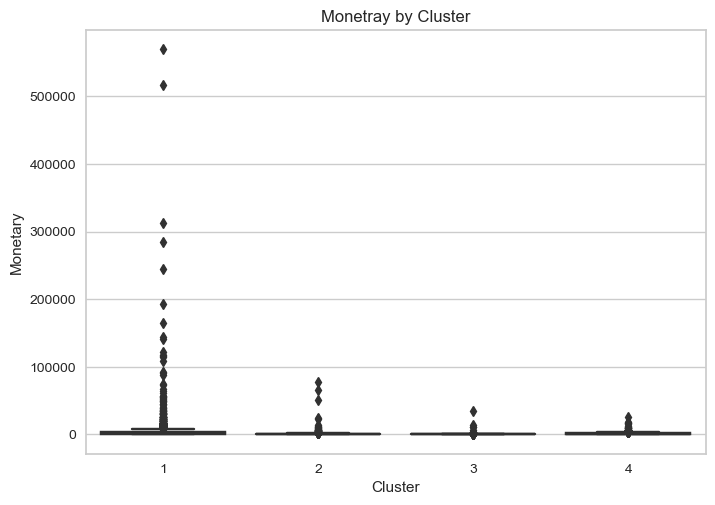

In [81]:
sns.boxplot(x='Cluster_no', y= 'Monetary', data=RFM_k)
plt.title('Monetray by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary')

Text(0.5, 1.0, 'Average RFM Values by Cluster')

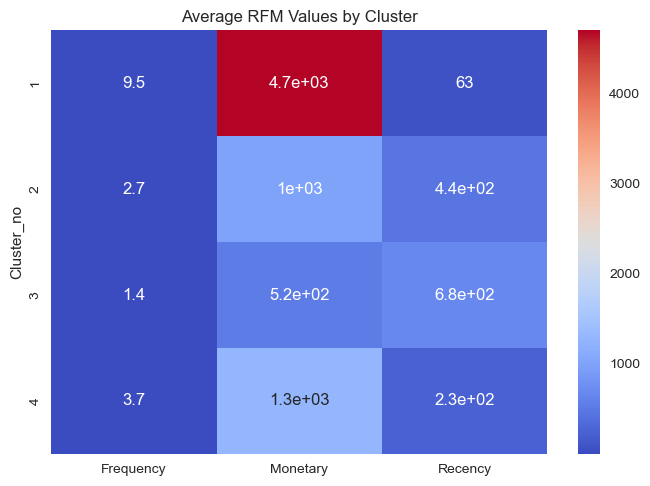

In [82]:
pivot_table = RFM_k.pivot_table(index='Cluster_no', values=['Recency', 'Frequency', 'Monetary'], aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True)
plt.title('Average RFM Values by Cluster')